QUESTION1


step 1 importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

step 2 and step 3: importing dataset link  and assigning it a variable called users

In [2]:
link = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
users = pd.read_csv(link, delimiter = '|')
users.head(10)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


step 4 :mean age as per occupation

In [3]:
mean_age = users.groupby(['occupation']).agg({'age':'mean'})
print("****Average age occupation wise****")
print(mean_age)

****Average age occupation wise****
                     age
occupation              
administrator  38.746835
artist         31.392857
doctor         43.571429
educator       42.010526
engineer       36.388060
entertainment  29.222222
executive      38.718750
healthcare     41.562500
homemaker      32.571429
lawyer         36.750000
librarian      40.000000
marketing      37.615385
none           26.555556
other          34.523810
programmer     33.121212
retired        63.071429
salesman       35.666667
scientist      35.548387
student        22.081633
technician     33.148148
writer         36.311111


step 5:Discover the Male ratio per occupation and sort it from the most to the least

In [4]:
male = users[users.gender > 'F']
male_sum = (male.groupby(['occupation'])['gender'].count()/users.groupby(['occupation'])['gender'].count())
print("****Male ratio - occupation wise sorted in descending order****")
print(male_sum)

****Male ratio - occupation wise sorted in descending order****
occupation
administrator    0.544304
artist           0.535714
doctor           1.000000
educator         0.726316
engineer         0.970149
entertainment    0.888889
executive        0.906250
healthcare       0.312500
homemaker        0.142857
lawyer           0.833333
librarian        0.431373
marketing        0.615385
none             0.555556
other            0.657143
programmer       0.909091
retired          0.928571
salesman         0.750000
scientist        0.903226
student          0.693878
technician       0.962963
writer           0.577778
Name: gender, dtype: float64


step 6: For each occupation, calculate the minimum and maximum ages

In [5]:
min_age = users.groupby(['occupation']).agg({'age':'min'})
max_age = users.groupby(['occupation']).agg({'age':'max'})
print("****Minimum age - occupation wise****")
print(min_age)
print(' ')
print("****Maximum age - occupation wise****")
print(max_age)

****Minimum age - occupation wise****
               age
occupation        
administrator   21
artist          19
doctor          28
educator        23
engineer        22
entertainment   15
executive       22
healthcare      22
homemaker       20
lawyer          21
librarian       23
marketing       24
none            11
other           13
programmer      20
retired         51
salesman        18
scientist       23
student          7
technician      21
writer          18
 
****Maximum age - occupation wise****
               age
occupation        
administrator   70
artist          48
doctor          64
educator        63
engineer        70
entertainment   50
executive       69
healthcare      62
homemaker       50
lawyer          53
librarian       69
marketing       55
none            55
other           64
programmer      63
retired         73
salesman        66
scientist       55
student         42
technician      55
writer          60


step 7:For each combination of occupation and sex, calculate the mean age

In [6]:
mean_age = users.groupby(['occupation','gender']).agg({'age':'mean'})
print("****Average age occupation and gender wise****")
print(mean_age)

****Average age occupation and gender wise****
                            age
occupation    gender           
administrator F       40.638889
              M       37.162791
artist        F       30.307692
              M       32.333333
doctor        M       43.571429
educator      F       39.115385
              M       43.101449
engineer      F       29.500000
              M       36.600000
entertainment F       31.000000
              M       29.000000
executive     F       44.000000
              M       38.172414
healthcare    F       39.818182
              M       45.400000
homemaker     F       34.166667
              M       23.000000
lawyer        F       39.500000
              M       36.200000
librarian     F       40.000000
              M       40.000000
marketing     F       37.200000
              M       37.875000
none          F       36.500000
              M       18.600000
other         F       35.472222
              M       34.028986
programmer    F       32.

step 8:For each occupation present the percentage of women and men

In [9]:
percent_m_f = (users.groupby(['occupation','gender'])['gender'].count().groupby(level =0).transform(lambda x: x/x.sum()*100))
print("****Gender wise percentage for each occupation****")
print(percent_m_f)

****Gender wise percentage for each occupation****
occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          3

QUESTION2

importing necessary files

In [8]:
import pandas as pd
import numpy as np

step 2 and step 3:Import the dataset and Assign it to a variable called euro12

In [10]:
link = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'
euro12 = pd.read_csv(link, delimiter = ',')
euro12.head(10)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


step4:Select only the Goal column

In [11]:
goals = euro12['Goals']
goals.head(5)

0    4
1    4
2    4
3    5
4    3
Name: Goals, dtype: int64

step5:How many team participated in the Euro2012?

In [12]:
team_count = len(euro12['Team'].unique())
print("The total number of teams which participated in the Euro12 are :",team_count)

The total number of teams which participated in the Euro12 are : 16


step6:What is the number of columns in the dataset?

In [13]:
euro12.shape
print("Total number of columns in the dataset are ", euro12.shape[1])

Total number of columns in the dataset are  35


step7:View only the columns Team, Yellow Cards and Red Cards and assign them 
to a dataframe called discipline

In [14]:
discipline = euro12[['Team','Yellow Cards','Red Cards']]
discipline.head(5)

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0


step8:Sort the teams by Red Cards, then to Yellow Cards 

In [15]:
discipline.sort_values(by=['Red Cards','Yellow Cards'],ascending = True)

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


step9:. Calculate the mean Yellow Cards given per Team


In [16]:
yellow_mean = euro12.groupby(['Team']).agg({'Yellow Cards':'mean'})
print("***The average yellow cards received per team are as follows :***")
print(yellow_mean)

***The average yellow cards received per team are as follows :***
                     Yellow Cards
Team                             
Croatia                       9.0
Czech Republic                7.0
Denmark                       4.0
England                       5.0
France                        6.0
Germany                       4.0
Greece                        9.0
Italy                        16.0
Netherlands                   5.0
Poland                        7.0
Portugal                     12.0
Republic of Ireland           6.0
Russia                        6.0
Spain                        11.0
Sweden                        7.0
Ukraine                       5.0


step10:Filter teams that scored more than 6 goals

In [17]:
team_six = euro12[euro12['Goals']>6]
print(team_six)

       Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
5   Germany     10               32                32             47.8%   
13    Spain     12               42                33             55.9%   

   % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
5             15.6%                          80             2              1   
13            16.0%                         100             0              1   

    Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won  \
5                      0  ...          10                 62.6%         63   
13                     0  ...          15                 93.8%        102   

   Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off  \
5              49        12             4          0       15        15   
13             83        19            11          0       17        17   

    Players Used  
5             17  
13            18  

[2 rows x 35 c

step11:Select the teams that start with G

In [20]:
new_euro = euro12[euro12["Team"].str.startswith("G")]
new_euro

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


step12:Select the first 7 columns

In [21]:
data_seven = euro12.iloc[:,:7]
print(data_seven)

                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

step13: Select all columns except the last 3


In [22]:
data_three = euro12.iloc[:,:-3]
print(data_three)

                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

QUESTION3

Step 1. Import the necessary libraries


In [23]:
import pandas as pd
import numpy as np

Step 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000 

In [24]:
series1 = pd.Series(np.random.randint(1,5,100))
series2 = pd.Series(np.random.randint(1,4,100))
series3 = pd.Series(np.random.randint(10000,30000,100))

Step 3. Create a DataFrame by joinning the Series by column

In [25]:
combined_series = {"Series1": series1,
                  "Series2": series2,
                  "Series3": series3}
combined_df = pd.concat(combined_series, axis = 1)
combined_df.head(10)

,Series1,Series2,Series3
0,2,3,21003
1,3,3,17296
2,1,3,29340
3,4,2,17661
4,2,2,20126
5,2,1,19184
6,4,2,16990
7,3,3,23182
8,1,2,12714
9,3,3,27912


Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [26]:
combined_df.rename(columns = {'Series1': 'bedrs','Series2':'bathrs','Series3':'price_sqr_meter'}, inplace = True)
combined_df.head(10)

,bedrs,bathrs,price_sqr_meter
0,2,3,21003
1,3,3,17296
2,1,3,29340
3,4,2,17661
4,2,2,20126
5,2,1,19184
6,4,2,16990
7,3,3,23182
8,1,2,12714
9,3,3,27912


Step 5. Create a one column DataFrame with the values of the 3 Series and assign it 
to 'bigcolumn'


In [29]:
bigcolumn = pd.DataFrame(combined_df['bedrs'].astype(str) + combined_df['bathrs'].astype(str) + combined_df['price_sqr_meter'].astype(str))

print(bigcolumn)
print(type(bigcolumn))

          0
0   2321003
1   3317296
2   1329340
3   4217661
4   2220126
..      ...
95  4218568
96  2121615
97  2312406
98  2119899
99  1210377

[100 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>


Step 6. Ops it seems it is going only until index 99. Is it true? 
yes it is true as the index is till 99 and the maximum rows are 100

Step 7. Reindex the DataFrame so it goes from 0 to 299

In [30]:
bigcolumn.reindex(range(0,300))

,0
0,2321003
1,3317296
2,1329340
3,4217661
4,2220126
...,...
295,NaN
296,NaN
297,NaN
298,NaN


QUESTION4

Step 1. Import the necessary libraries

In [52]:
import pandas as pd
import pandas as np
from datetime import date
import datetime as dt 

Step 2. Import the dataset from the attached file wind.txt
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper 
datetime index.

In [53]:
data= pd.read_fwf('wind.txt',parse_dates=[['Yr','Mo','Dy']])
data["Yr_Mo_Dy"] = pd.to_datetime(data["Yr_Mo_Dy"])
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


Step 4. Year 2061? Do we really have data from this year? Create a function to fix it 
and apply it.


In [54]:
data["Yr_Mo_Dy"] = data["Yr_Mo_Dy"].apply(lambda x: dt.date(x.year-100, x.month, x.day) if x.year>1989 else dt.date(x.year, x.month, x.day))
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


Step 5. Set the right dates as the index. Pay attention at the data type, it should be 
datetime64

In [55]:
data["Yr_Mo_Dy"] = pd.to_datetime(data["Yr_Mo_Dy"])
display(data.dtypes)
data = data.set_index('Yr_Mo_Dy')
data.index
data

Yr_Mo_Dy    datetime64[ns]
RPT                float64
VAL                float64
ROS                float64
KIL                float64
SHA                float64
BIR                float64
DUB                float64
CLA                float64
MUL                float64
CLO                float64
BEL                float64
MAL                float64
dtype: object

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


Step 6. Compute how many values are missing for each location over the entire 
record.They should be ignored in all calculations below.

In [56]:
data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

Step 7. Compute how many non-missing values there are in total.

In [57]:
data.notnull().sum()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and 
all the times.

In [58]:
data.mean().mean()

10.227982360836924

Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean 
windspeeds and standard deviations of the windspeeds at each location over all the 
days

In [59]:
loc_stats = pd.concat([data.min(), data.max(), data.mean(), data.std()], axis=1) 
loc_stats.rename(columns={0:'Min', 1:'Max', 2:'Mean', 3:'Std'}, inplace=True)
loc_stats

,Min,Max,Mean,Std
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555
CLA,0.00,31.08,8.495053,4.499449
MUL,0.00,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


Step 10. Create a DataFrame called day_stats and calculate the min, max and mean 
windspeed and standard deviations of the windspeeds across all the locations at each 
day.
A different set of numbers for each day

In [60]:
day_stats = pd.concat([data.min(axis=1), data.max(axis=1), data.mean(axis=1), data.std(axis=1)], axis=1)

day_stats.rename(columns={0:'Min',1:'Max',2:'Mean',3:'Std'}, inplace=True)

day_stats

,Min,Max,Mean,Std
Yr_Mo_Dy,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


Step 11. Find the average windspeed in January for each location. 
Treat January 1961 and January 1962 both as January.

In [61]:
data[data.index.month==1].mean()


RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

Step 12. Downsample the record to a yearly frequency for each location. 

In [62]:
resample_data = data.resample('Y').ffill()

resample_data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-12-31,9.87,7.83,7.67,3.75,5.66,3.50,10.04,3.08,5.04,3.79,8.04,14.67
1962-12-31,22.67,16.88,28.67,14.12,19.75,17.08,27.79,25.21,19.83,17.79,25.46,37.63
1963-12-31,13.88,14.42,12.12,9.25,14.33,10.67,18.29,11.96,12.04,15.37,16.79,14.09
1964-12-31,16.33,19.25,13.37,10.08,17.04,12.54,19.83,13.79,12.67,15.04,21.37,23.58
1965-12-31,13.62,13.88,12.29,6.08,12.33,7.41,9.59,10.21,7.46,12.17,15.71,16.75
1966-12-31,13.00,11.46,10.13,6.34,11.87,7.50,13.50,8.46,11.00,10.04,17.29,22.46
1967-12-31,16.88,13.75,11.34,9.08,13.54,7.71,11.75,11.83,11.83,11.75,17.25,22.63
1968-12-31,9.13,2.13,7.38,2.50,4.04,0.50,6.83,2.54,3.54,5.50,5.71,12.42
1969-12-31,14.42,13.83,27.71,7.08,12.08,10.00,14.58,11.00,12.54,7.12,11.17,17.41


Step 13. Downsample the record to a monthly frequency for each location.

In [63]:
month_resample= data.resample('M').ffill()
month_resample

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-31,24.21,19.55,16.71,11.96,14.42,10.46,14.88,8.21,10.50,9.96,12.42,13.92
1961-02-28,12.92,12.75,NaN,8.92,16.13,12.29,14.75,14.46,13.96,14.04,18.41,13.17
1961-03-31,8.96,8.04,9.13,8.50,10.75,9.54,11.92,9.59,11.25,8.54,11.96,12.21
1961-04-30,11.67,11.00,9.54,5.54,9.42,5.79,5.09,8.25,6.96,6.25,12.21,8.75
1961-05-31,7.00,9.79,12.25,4.83,8.25,5.37,6.58,9.29,6.58,7.12,11.87,10.63
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,11.54,5.54,7.41,4.67,7.62,6.17,8.87,5.25,7.83,6.17,11.58,16.88
1978-09-30,26.75,15.63,16.54,13.37,17.58,13.13,16.92,13.79,13.46,13.79,18.91,31.88
1978-10-31,8.58,4.29,10.79,4.29,4.08,2.71,4.63,1.04,3.67,2.75,8.71,10.67


Step 14. Downsample the record to a weekly frequency for each location

In [64]:
week_resample= data.resample('W').ffill()
week_resample

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-08,10.96,9.75,7.62,5.91,9.62,7.29,14.29,7.62,9.25,10.46,16.62,16.46
1961-01-15,12.04,9.67,11.75,2.37,7.38,3.13,2.50,6.83,4.75,5.63,7.54,6.75
1961-01-22,9.59,5.88,9.92,2.17,6.87,5.50,9.38,7.04,6.34,7.50,10.88,9.92
1961-01-29,NaN,23.91,22.29,17.54,24.08,19.70,22.00,20.25,21.46,19.95,27.71,23.38
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,21.21,21.34,17.75,11.58,16.75,14.46,17.46,15.29,15.79,17.50,21.42,25.75
1978-12-10,24.92,22.54,16.54,14.62,15.59,13.00,13.21,14.12,16.21,16.17,26.08,21.92
1978-12-17,9.87,3.21,8.04,2.21,3.04,0.54,2.46,1.46,1.29,2.67,5.00,9.08


Step 15. Calculate the min, max and mean windspeeds and standard deviations of the 
windspeeds across all locations for each week (assume that the first week starts on B
January 2 1961) for the first 52 weeks

In [65]:
wk_stat=week_resample.groupby(week_resample.index.to_period('W')).agg(['min','max','mean','std'])
wk_stat.loc[wk_stat.index[1:53],:]

RPT                      VAL                    \
                         min    max   mean std    min    max   mean std   
Yr_Mo_Dy                                                                  
1961-01-02/1961-01-08  10.96  10.96  10.96 NaN   9.75   9.75   9.75 NaN   
1961-01-09/1961-01-15  12.04  12.04  12.04 NaN   9.67   9.67   9.67 NaN   
1961-01-16/1961-01-22   9.59   9.59   9.59 NaN   5.88   5.88   5.88 NaN   
1961-01-23/1961-01-29    NaN    NaN    NaN NaN  23.91  23.91  23.91 NaN   
1961-01-30/1961-02-05  22.00  22.00  22.00 NaN  16.75  16.75  16.75 NaN   
1961-02-06/1961-02-12  16.00  16.00  16.00 NaN  16.92  16.92  16.92 NaN   
1961-02-13/1961-02-19  16.17  16.17  16.17 NaN  15.59  15.59  15.59 NaN   
1961-02-20/1961-02-26  25.80  25.80  25.80 NaN  21.50  21.50  21.50 NaN   
1961-02-27/1961-03-05  11.25  11.25  11.25 NaN  17.00  17.00  17.00 NaN   
1961-03-06/1961-03-12    NaN    NaN    NaN NaN  13.88  13.88  13.88 NaN   
1961-03-13/1961-03-19  11.42  11.42  11.42 NaN   9.46   9.46   9.46 NaN   
1961-03-20/1961-03-26  15.00  15.00  15.00 NaN  11.63  11.63  11.63 NaN   
1961-03-27/1961-04-02   7.62   7.62   7.62 NaN   4.25   4.25   4.25 NaN   
1961-04-03/1961-04-09  13.37  13.37  13.37 NaN  11.12  11.12  11.12 NaN   
1961-04-10/1961-04-16   4.71   4.71   4.71 NaN   7.00   7.00   7.00 NaN   
1961-04-17/1961-04-23  12.21  12.21  12.21 NaN   7.87   7.87   7.87 NaN   
1961-04-24/1961-04-30  11.67  11.67  11.67 NaN  11.00  11.00  11.00 NaN   
1961-05-01/1961-05-07  18.16  18.16  18.16 NaN  17.71  17.71  17.71 NaN   
1961-05-08/1961-05-14   9.25   9.25   9.25 NaN   6.54   6.54   6.54 NaN   
1961-05-15/1961-05-21   6.83   6.83   6.83 NaN   4.29   4.29   4.29 NaN   
1961-05-22/1961-05-28   9.96   9.96   9.96 NaN   7.67   7.67   7.67 NaN   
1961-05-29/1961-06-04   8.50   8.50   8.50 NaN   6.42   6.42   6.42 NaN   
1961-06-05/1961-06-11   8.29   8.29   8.29 NaN   6.83   6.83   6.83 NaN   
1961-06-12/1961-06-18  12.12  12.12  12.12 NaN   9.29   9.29   9.29 NaN   
1961-06-19/1961-06-25   9.00   9.00   9.00 NaN   8.25   8.25   8.25 NaN   
1961-06-26/1961-07-02  12.04  12.04  12.04 NaN   7.25   7.25   7.25 NaN   
1961-07-03/1961-07-09   7.29   7.29   7.29 NaN   5.71   5.71   5.71 NaN   
1961-07-10/1961-07-16  21.42  21.42  21.42 NaN  10.88  10.88  10.88 NaN   
1961-07-17/1961-07-23   3.04   3.04   3.04 NaN   3.71   3.71   3.71 NaN   
1961-07-24/1961-07-30   6.13   6.13   6.13 NaN  10.41  10.41  10.41 NaN   
1961-07-31/1961-08-06   8.38   8.38   8.38 NaN   6.71   6.71   6.71 NaN   
1961-08-07/1961-08-13  12.96  12.96  12.96 NaN   9.13   9.13   9.13 NaN   
1961-08-14/1961-08-20  13.75  13.75  13.75 NaN  13.62  13.62  13.62 NaN   
1961-08-21/1961-08-27  11.25  11.25  11.25 NaN  13.59  13.59  13.59 NaN   
1961-08-28/1961-09-03  11.63  11.63  11.63 NaN   7.29   7.29   7.29 NaN   
1961-09-04/1961-09-10   5.00   5.00   5.00 NaN   8.79   8.79   8.79 NaN   
1961-09-11/1961-09-17   5.33   5.33   5.33 NaN   7.12   7.12   7.12 NaN   
1961-09-18/1961-09-24   8.00   8.00   8.00 NaN   6.04   6.04   6.04 NaN   
1961-09-25/1961-10-01  14.25  14.25  14.25 NaN  12.87  12.87  12.87 NaN   
1961-10-02/1961-10-08  15.37  15.37  15.37 NaN  11.87  11.87  11.87 NaN   
1961-10-09/1961-10-15   7.79   7.79   7.79 NaN   6.87   6.87   6.87 NaN   
1961-10-16/1961-10-22  25.04  25.04  25.04 NaN  18.88  18.88  18.88 NaN   
1961-10-23/1961-10-29   4.33   4.33   4.33 NaN   2.75   2.75   2.75 NaN   
1961-10-30/1961-11-05  13.33  13.33  13.33 NaN  12.29  12.29  12.29 NaN   
1961-11-06/1961-11-12  14.83  14.83  14.83 NaN   9.87   9.87   9.87 NaN   
1961-11-13/1961-11-19  11.46  11.46  11.46 NaN   7.62   7.62   7.62 NaN   
1961-11-20/1961-11-26   6.25   6.25   6.25 NaN  10.04  10.04  10.04 NaN   
1961-11-27/1961-12-03  13.75  13.75  13.75 NaN  10.13  10.13  10.13 NaN   
1961-12-04/1961-12-10  23.71  23.71  23.71 NaN  21.37  21.37  21.37 NaN   
1961-12-11/1961-12-17  13.17  13.17  13.17 NaN   9.13   9.13   9.13 NaN   
1961-12-18/1961-12-24  20.54  20.54  20.54 NaN  13

QUESTION5

Step 1. Import the necessary libraries

In [34]:
import pandas as pd
import numpy as np


Step 2. Import the dataset 
Step 3. Assign it to a variable called chipo. 

In [45]:
link = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_table(link)

Step 4. See the first 10 entries

In [36]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


Step 5. What is the number of observations in the dataset?

In [37]:
print("No.of observations in the dataset are: {}".format(chipo.shape[0]))

No.of observations in the dataset are: 4622


Step 6. What is the number of columns in the dataset?

In [38]:
print("No.of columns in the dataset are: {}".format(chipo.shape[1]))

No.of columns in the dataset are: 5


Step 7. Print the name of all the columns. 

In [39]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

Step 8. How is the dataset indexed?

python uses o based indexes and does the dataset
It starts from o and ends till 4621

In [41]:
chipo.head(6)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98


Step 9. Which was the most-ordered item?
Step 10. For the most-ordered item, how many items were ordered?

In [42]:
most_ordered = chipo.groupby(['item_name']).agg({'quantity':'sum'}).sort_values(by='quantity',ascending = False)
print("**** Most ordered item is :"+ str(most_ordered.iloc[0].name)+" with an order quantity of "+ str(most_ordered.iloc[0].quantity) +" units***")


**** Most ordered item is :Chicken Bowl with an order quantity of 761 units***


Step 11. What was the most ordered item in the choice_description column?

In [43]:
most_ordered = chipo.groupby(['choice_description']).agg({'quantity':'sum'}).sort_values(by='quantity', ascending = False)
print("****Most ordered item is :"+str(most_ordered.iloc[0].name)+" with an order quantity of "+ str(most_ordered.iloc[0].quantity) +" units****")
display(most_ordered.head(1))

****Most ordered item is :[Diet Coke] with an order quantity of 159 units****


,quantity
choice_description,
[Diet Coke],159


Step 12. How many items were orderd in total?

In [44]:
print("Total orders :",chipo['quantity'].sum())

Total orders : 4972


step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type

In [46]:
chipo['item_price'] = chipo['item_price'].str.replace('$','').astype(float)
chipo.head(10)

C:\Users\tinth\AppData\Local\Temp\ipykernel_29060\3151841200.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  chipo['item_price'] = chipo['item_price'].str.replace('$','').astype(float)


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
6,3,1,Side of Chips,NaN,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25


Step 14. How much was the revenue for the period in the dataset? 

In [47]:
print("Total revenue : $",chipo['item_price'].sum())

Total revenue : $ 34500.16


Step 16. What is the average revenue amount per order? 

In [49]:
print('*** Average amount per order')
print(chipo.groupby(['order_id']).agg({'item_price':'mean'}))

*** Average amount per order
          item_price
order_id            
1           2.890000
2          16.980000
3           6.335000
4          10.500000
5           6.850000
...              ...
1830       11.500000
1831        4.300000
1832        6.600000
1833       11.750000
1834        9.583333

[1834 rows x 1 columns]


Step 17. How many different items are sold?


In [48]:
print("Total unique items  : ",chipo['item_name'].nunique())

Total unique items  :  50


QUESTION6

Create a line plot showing the number of marriages and divorces per capita in the
U.S. between 1867 and 2014. Label both lines and show the legend. 
Don't forget to label your axes!

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
us_data = pd.read_csv('us-marriages-divorces-1867-2014 (1).csv')
us_data.head(10)

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3
5,1872,378000.0,12000.0,42066000,9.0,0.3
6,1873,386000.0,13000.0,43225000,8.9,0.3
7,1874,385000.0,14000.0,44429000,8.7,0.3
8,1875,409000.0,14000.0,45492000,9.0,0.3
9,1876,405000.0,15000.0,46459000,8.7,0.3


QUESTION7

Create a vertical bar chart comparing the number of marriages and divorces per 
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

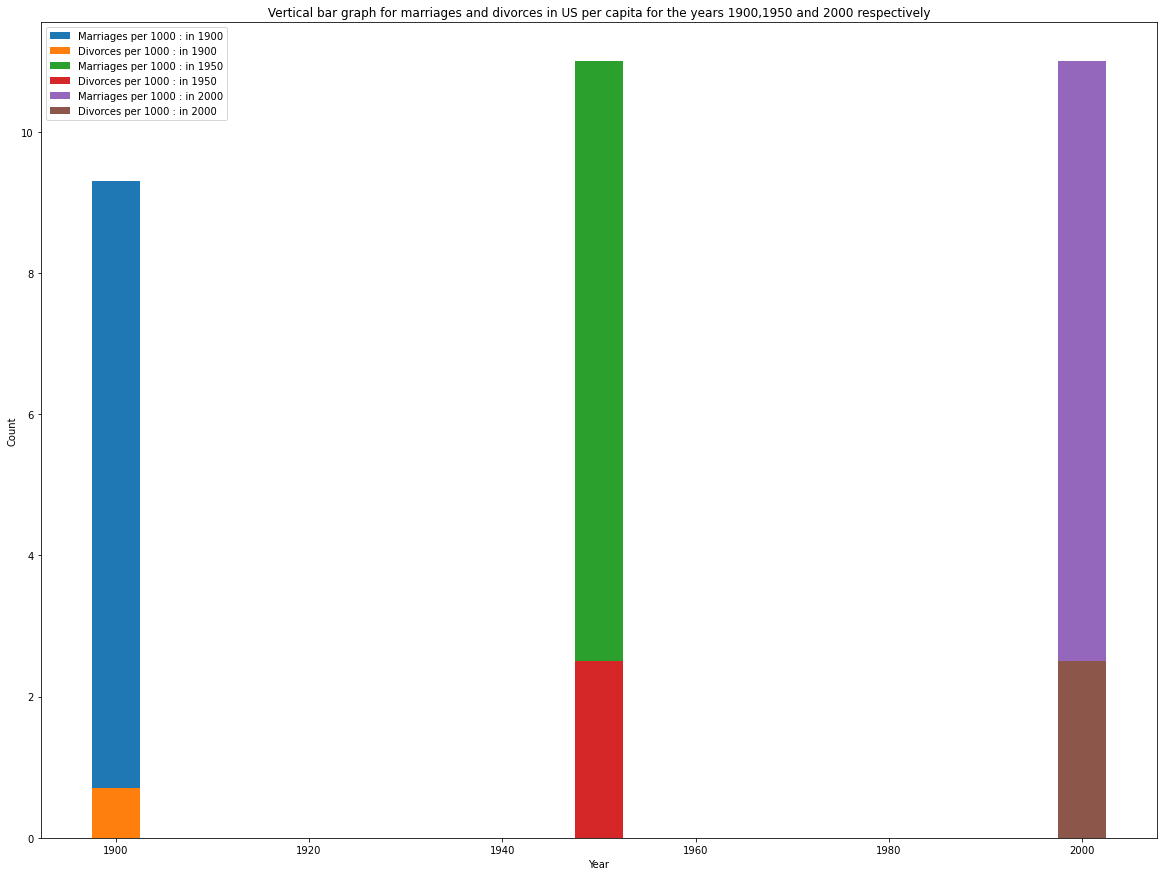

In [40]:
us_data = pd.read_csv('us-marriages-divorces-1867-2014 (1).csv')

us_data_1900 = us_data[us_data['Year']== 1900]
us_data_1950 = us_data[us_data['Year']== 1950]
us_data_2000 = us_data[us_data['Year']== 2000]
plt.bar(us_data_1900['Year'], us_data_1900['Marriages_per_1000'], width = 5, label = 'Marriages per 1000 : in 1900')
plt.bar(us_data_1900['Year'], us_data_1900['Divorces_per_1000'], width = 5, label = 'Divorces per 1000 : in 1900')
plt.bar(us_data_1950['Year'], us_data_1950['Marriages_per_1000'],width = 5, label = 'Marriages per 1000 : in 1950')
plt.bar(us_data_1950['Year'], us_data_1950['Divorces_per_1000'], width = 5, label = 'Divorces per 1000 : in 1950')
plt.bar(us_data_2000['Year'], us_data_1950['Marriages_per_1000'],width = 5, label = 'Marriages per 1000 : in 2000')
plt.bar(us_data_2000['Year'], us_data_1950['Divorces_per_1000'], width = 5, label = 'Divorces per 1000 : in 2000')
plt.xlabel("Year") 
plt.ylabel("Count") 
plt.legend(loc="upper left")
plt.title(" Vertical bar graph for marriages and divorces in US per capita for the years 1900,1950 and 2000 respectively ")
#plt.rcParams ["figure.figsize"] = (15,10)
plt.show()


QUESTION8

Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort 
the actors by their kill count and label each bar with the corresponding actor's name. 
Don't forget to label your axes!


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
actors = pd.read_csv('actor_kill_counts (1).csv')
actors.head(10)

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239
5,Jet Li,201
6,Nicolas Cage,204
7,Sylvester Stallone,267
8,Tomisaburo Wakayama,226
9,Wesley Snipes,193


In [15]:
kill_count = actors.sort_values(by = 'Count', ascending = True)
kill_count.head(10)

,Actor,Count
9,Wesley Snipes,193
3,Clive Owen,194
5,Jet Li,201
6,Nicolas Cage,204
2,Clint Eastwood,207
8,Tomisaburo Wakayama,226
4,Dolph Lundgren,239
7,Sylvester Stallone,267
1,Chow Yun-Fat,295
0,Arnold Schwarzenegger,369


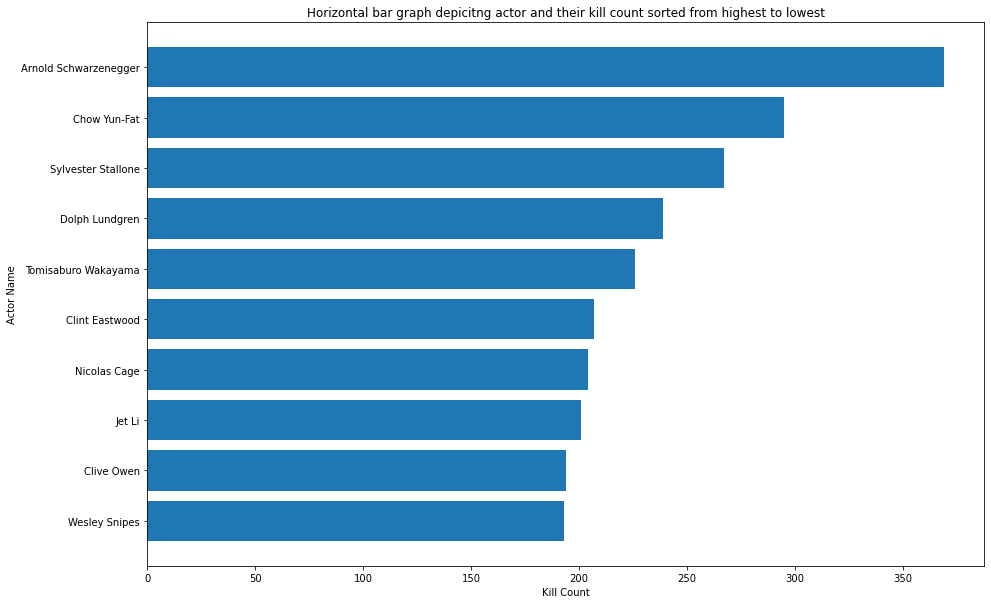

In [19]:
plt.barh(kill_count['Actor'], kill_count['Count'])
plt.ylabel("Actor Name")
plt.xlabel("Kill Count")
plt.title("Horizontal bar graph depicitng actor and their kill count sorted from highest to lowest")
plt.rcParams ["figure.figsize"] = (20,15)
plt.show()

QUESTION9

Create a pie chart showing the fraction of all Roman Emperors that were 
assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the 
percentage breakdown of the categories.

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
romans = pd.read_csv('roman-emperor-reigns (1).csv')
romans.head(15)

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide
5,Galba,0.58,Assassinated
6,Otho,0.25,Suicide
7,Vitellius,0.67,Assassinated
8,Vespasian,10.00,Natural causes
9,Titus,3.25,Illness


In [26]:
assasinated = romans[romans['Cause_of_Death']== 'Assassinated']
assasinated.head(15)

,Emperor,Length_of_Reign,Cause_of_Death
2,Caligula,4.83,Assassinated
5,Galba,0.58,Assassinated
7,Vitellius,0.67,Assassinated
10,Domitian,15.00,Assassinated
17,Commodus,15.00,Assassinated
18,Pertinax,0.25,Assassinated
21,Caracalla,19.00,Assassinated
22,Geta,3.00,Assassinated
24,Elagabalus,3.75,Assassinated
25,Severus Alexander,13.00,Assassinated


In [27]:
percent_assasination = romans.groupby(['Cause_of_Death'])['Cause_of_Death'].count().transform(lambda x: x/x.sum()*100)
percent_death = pd.DataFrame(percent_assasination)
percent_death.rename(columns={'Cause_of_Death': "Percent_Cause_of_death" }, inplace = True)
display(percent_death.head(15))
percent_death['Cause_of_Death'] = percent_death.index

,Percent_Cause_of_death
Cause_of_Death,
Assassinated,32.352941
Died in captivity,1.470588
Executed,4.411765
Illness,7.352941
Killed in battle,11.764706
Natural causes,23.529412
Possibly assassinated,11.764706
Suicide,7.352941


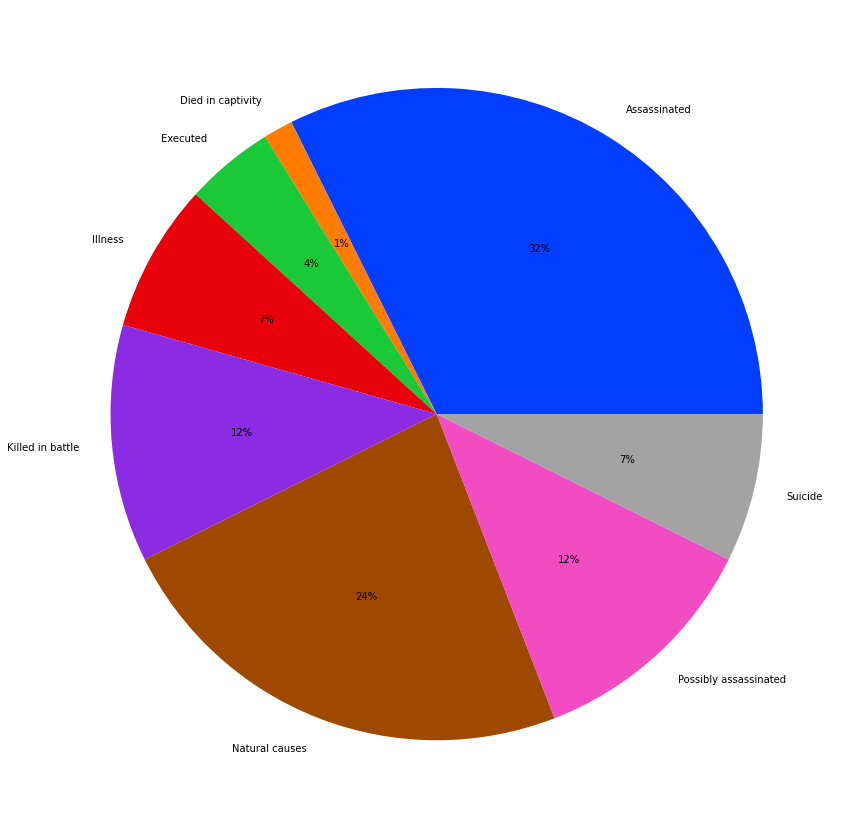

In [31]:
data=percent_death['Percent_Cause_of_death']
keys = percent_death['Cause_of_Death']
palette_color = sns.color_palette('bright')

plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')

plt.show()
plt.rcParams ["figure.figsize"] = (20,15)

QUESTION10

Create a scatter plot showing the relationship between the total revenue earned by 
arcades and the number of Computer Science PhDs awarded in the U.S. between 
2000 and 2009.
Don't forget to label your axes! 
Color each dot according to its year.

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
revenue = pd.read_csv('arcade-revenue-vs-cs-doctorates (1).csv')
revenue.head(10)

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


<AxesSubplot:xlabel='Total Arcade Revenue (billions)', ylabel='Computer Science Doctorates Awarded (US)'>

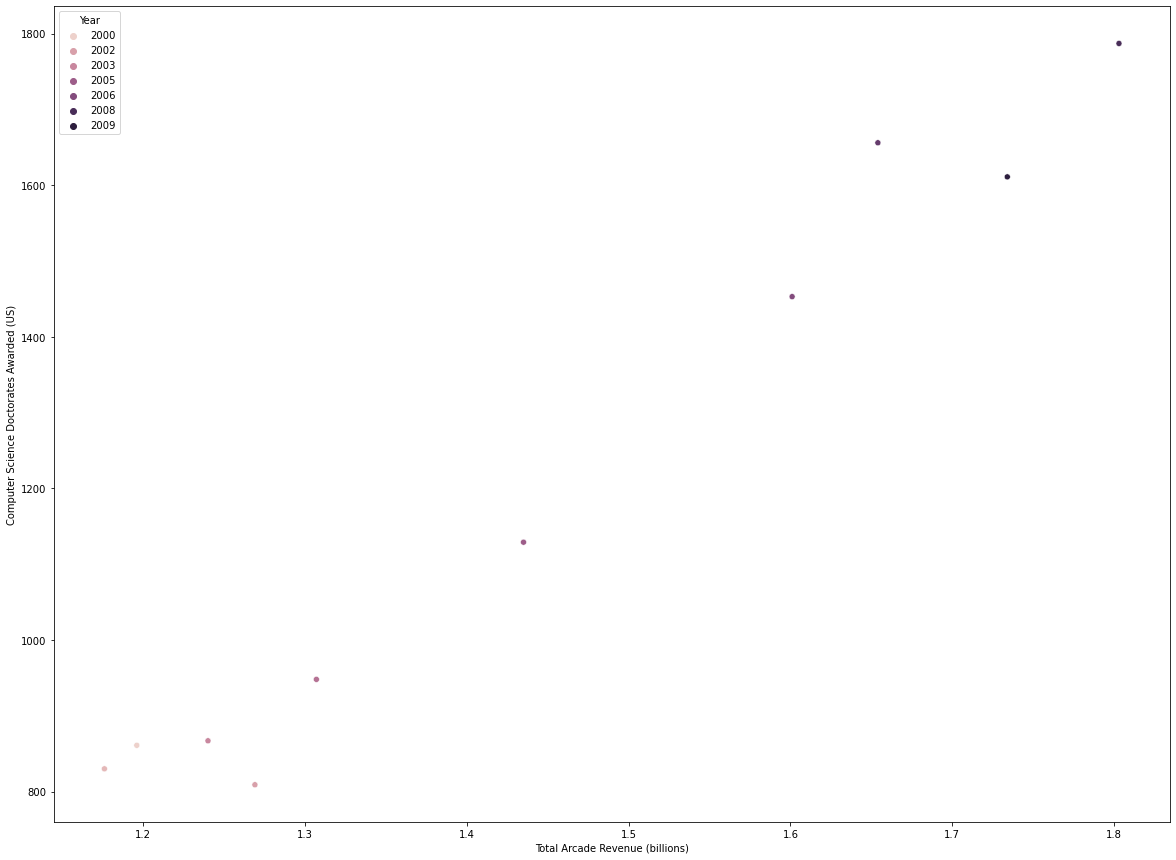

In [36]:
sns.scatterplot(x=revenue['Total Arcade Revenue (billions)'], y=revenue['Computer Science Doctorates Awarded (US)'], data= revenue, hue = 'Year')